Setup Paths

In [2]:
import os 

In [3]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet'
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtext'

In [4]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow','workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow','workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow','workspace','images'),
    'MODEL_PATH':os.path.join('Tensorflow','workspace','models'),
    'PRETRAINED_MODEL_PATH':os.path.join('Tensorflow','workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow','workspace','models',CUSTOM_MODEL_NAME),
    'OUTPUT_PATH': os.path.join('Tensorflow','workspace','models',CUSTOM_MODEL_NAME,'export'),
    'TFJS_PATH': os.path.join('Tensorflow','workspace','models',CUSTOM_MODEL_NAME,'tfjsexport'),
    'TFLITE_PATH': os.path.join('Tensorflow','workspace','models',CUSTOM_MODEL_NAME,'tfliteexport '),
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
}

In [5]:
paths ['CHECKPOINT_PATH']

'Tensorflow\\workspace\\models\\my_ssd_mobnet'

In [6]:
files = {
    'PIPELINE_CONFIG': os.path.join('Tensorflow','workspace','models',CUSTOM_MODEL_NAME,'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME),
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [7]:
for path in paths.values():
    if os.name =='nt':
        !mkdir {path}

A subdirectory or file Tensorflow\workspace already exists.


A subdirectory or file Tensorflow\scripts already exists.
A subdirectory or file Tensorflow\models already exists.
A subdirectory or file Tensorflow\workspace\annotations already exists.
A subdirectory or file Tensorflow\workspace\images already exists.
A subdirectory or file Tensorflow\workspace\models already exists.
A subdirectory or file Tensorflow\workspace\pre-trained-models already exists.
A subdirectory or file Tensorflow\workspace\models\my_ssd_mobnet already exists.
A subdirectory or file Tensorflow\workspace\models\my_ssd_mobnet\export already exists.
A subdirectory or file Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport already exists.
A subdirectory or file Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport already exists.
A subdirectory or file Tensorflow\protoc already exists.


Tensorflow Model zoo and installation 

In [8]:
if os.name =='nt':
    !pip install wget
    import wget 

In [9]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'],'research','object detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

fatal: destination path 'Tensorflow\models' already exists and is not an empty directory.


In [10]:
"""if os.name== 'nt':
    url = "https://github.com/protocolbuffers/protobuf/releases/download/v3.20.3/protoc-3.20.3-win64.zip"
    wget.download(url)
    !move protoc-3.20.3-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.20.3-win64.zip 
    os.environ['PATH']+= os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'],'bin'))
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . """

'if os.name== \'nt\':\n    url = "https://github.com/protocolbuffers/protobuf/releases/download/v3.20.3/protoc-3.20.3-win64.zip"\n    wget.download(url)\n    !move protoc-3.20.3-win64.zip {paths[\'PROTOC_PATH\']}\n    !cd {paths[\'PROTOC_PATH\']} && tar -xf protoc-3.20.3-win64.zip \n    os.environ[\'PATH\']+= os.pathsep + os.path.abspath(os.path.join(paths[\'PROTOC_PATH\'],\'bin\'))\n    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install\n    !cd Tensorflow/models/research/slim && pip install -e . '

In [11]:
"""VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}"""

"VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')\n# Verify Installation\n!python {VERIFICATION_SCRIPT}"

In [12]:
%pip show tensorflow

Name: tensorflow
Version: 2.13.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: d:\python\project\obj\lib\site-packages
Requires: tensorflow-intel
Required-by: tf-models-official
Note: you may need to restart the kernel to use updated packages.


In [13]:
if os.name=="nt":
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -xvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


LABEL MAP #Case sensitive too much! be careful  

In [14]:
labels = [{'name':'ThumbsUp','id':1},{'name':'ThumbsDown','id':2},{'name':'ThankYou','id':3},{'name':'LiveLong','id':4}]

with open(files['LABELMAP'],'w') as f:
    for label in labels:
        f.write('item{\n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

Create tensorflow Records  #helps speeding up training 

In [15]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


Copy Model Config to Training Folder 

In [16]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


Update Config for Transfer Learning 

In [17]:
import tensorflow as tf 
from object_detection.utils import config_util 
from object_detection.protos import pipeline_pb2 
from google.protobuf import text_format 

In [18]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [19]:
config 

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 4e-005
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0
           stddev: 0.01
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.997
         scale: true
         epsilon: 0.001
       }
     }
     override_base_feature_extractor_hyperparams: true
     use_depthwise: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10
       x_scale: 10
       height_scale: 5
       width_scale: 5
     }
   }
   matcher {
     argmax_matcher {
       matched_threshold: 0.5
       unmatch

In [20]:
pipeline_config  = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'],"r") as f:
    proto_str = f.read()
    text_format.Merge(proto_str, pipeline_config)

In [21]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4 
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path = files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'],'test.record')]

In [22]:
config_text = text_format.MessageToString(pipeline_config)
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'],"wb") as f:
    f.write(config_text)

TRAINING THE MODEL 

In [23]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'],'research','object_detection','model_main_tf2.py')


In [24]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'], files["PIPELINE_CONFIG"])

In [25]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=2000


Evaluation 

In [26]:
command  = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [27]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet


Load Train Model From Checkpoint 

In [28]:
import os 
import tensorflow as tf 
from object_detection.utils import label_map_util 
from object_detection.utils import visualization_utils as viz_utils 
from object_detection.builders import model_builder 
from object_detection.utils import config_util 

In [29]:
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

#Restore checkpoint 
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'],'ckpt-3')).expect_partial() 

@tf.function 
def detect_fn(image):
    image,shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image,shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections 

Detect Images 

In [30]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt 
%matplotlib inline 

In [31]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])


In [32]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test','thumbsup.af8d288b-3833-11ef-b9ae-8b40e93f5176.jpg')

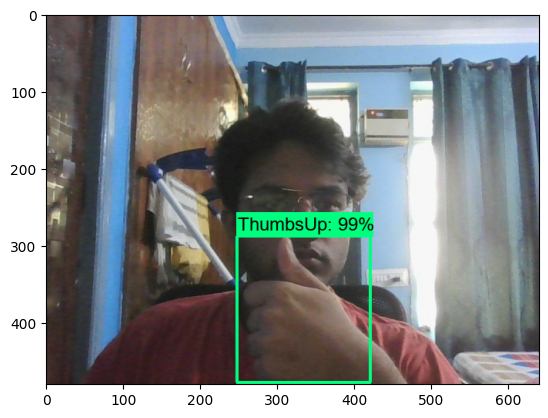

In [33]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np,0), dtype = tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
detections['num_detections'] = num_detections

#detection
detections['detection_classes']  = detections['detection_classes'].astype(np.int64)

label_id_offset = 1 
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(image_np_with_detections, detections['detection_boxes'], detections['detection_classes']+label_id_offset,detections['detection_scores'], category_index, use_normalized_coordinates=True,max_boxes_to_draw=5,min_score_thresh=.8,agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

Real Time Detections from cam 

In [34]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened():
    ret,frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np,0), dtype = tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
    
    detections['num_detections'] = num_detections
    
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
    
    label_id_offset = 1 
    image_np_with_detections = image_np.copy()
    
    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'],
        detections['detection_classes']+label_id_offset,
        detections['detection_scores'],
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=5,
        min_score_thresh = .8,
        agnostic_mode=False
    )
    cv2.imshow('object detection', cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break 